# Analysis of Dog bites by Breed
### Question: What dog breed has been the most frequent biter?

In [2]:
# Read in necesary libraries and modules
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore') 
from scipy.stats import ttest_ind 
from subprocess import check_output 

In [3]:
# Read in the Data
df = pd.read_csv("Health_AnimalBites.csv")
df.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


In [5]:
# Let's look at how many rows we have (rows, columns)
df.shape 

(9003, 15)

In [6]:
df.SpeciesIDDesc.unique() 

array(['DOG', 'CAT', 'BAT', 'RACCOON', 'OTHER', 'RABBIT', nan, 'HORSE',
       'SKUNK', 'FERRET'], dtype=object)

If you look at the column that includes the different 'Species', it looks like we have dogs AND a lot of other animals in our dataset. Let's strip everything besides dogs species.

In [7]:
# Create a unique dataframe in which only dogs are included
dogs = df.loc[df['SpeciesIDDesc'] == 'DOG', :]
dogs.shape # prints out (rows, columns)

(7029, 15)

In [8]:
dogs.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
0,1985-05-05 00:00:00,DOG,NaN,FEMALE,LIG. BROWN,1.0,1985-06-20 00:00:00,40229,NO,BODY,1985-05-05 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1,1986-02-12 00:00:00,DOG,NaN,UNKNOWN,BRO & BLA,NaN,NaN,40218,NO,BODY,1986-02-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
2,1987-05-07 00:00:00,DOG,NaN,UNKNOWN,NaN,NaN,NaN,40219,NO,BODY,1990-05-07 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
3,1988-10-02 00:00:00,DOG,NaN,MALE,BLA & BRO,NaN,NaN,NaN,NO,BODY,1990-10-02 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
4,1989-08-29 00:00:00,DOG,NaN,FEMALE,BLK-WHT,NaN,NaN,NaN,NO,BODY,NaN,UNKNOWN,NaN,NaN,UNKNOWN


Let's get rid of all row's that have a NaN in the Breed column:

In [9]:
dogs_with_breed = dogs.dropna(subset = ['BreedIDDesc'])
# prints out (rows, columns)
dogs_with_breed.shape 

(3755, 15)

In [11]:
dogs_with_breed.head()

,bite_date,SpeciesIDDesc,BreedIDDesc,GenderIDDesc,color,vaccination_yrs,vaccination_date,victim_zip,AdvIssuedYNDesc,WhereBittenIDDesc,quarantine_date,DispositionIDDesc,head_sent_date,release_date,ResultsIDDesc
1153,2010-12-24 00:00:00,DOG,GERM SHEPHERD,UNKNOWN,BROWN/BLAC,NaN,NaN,40291,NO,BODY,2010-12-27 00:00:00,UNKNOWN,2010-12-26 00:00:00,NaN,NEGATIVE
1202,2011-01-11 00:00:00,DOG,DACHSHUND,MALE,RED,1.0,2010-02-12 00:00:00,40207,NO,BODY,2011-01-12 00:00:00,UNKNOWN,NaN,NaN,UNKNOWN
1208,2011-01-16 00:00:00,DOG,PIT BULL,UNKNOWN,BLK-WHITE,NaN,NaN,40216,NO,BODY,2011-01-18 00:00:00,KILLED,2011-01-16 00:00:00,NaN,NEGATIVE
1239,2011-01-28 00:00:00,DOG,GERM SHEPHERD,MALE,BLACK,NaN,NaN,40215,NO,NaN,2011-01-28 00:00:00,NaN,NaN,NaN,NaN
1244,2011-01-29 00:00:00,DOG,SHIH TZU,MALE,BEIGE-WHT,3.0,2010-07-26 00:00:00,40223,NO,BODY,2011-01-31 00:00:00,NaN,NaN,NaN,NaN


We have our desired datafram, let's look at the answer to our question with a visual:

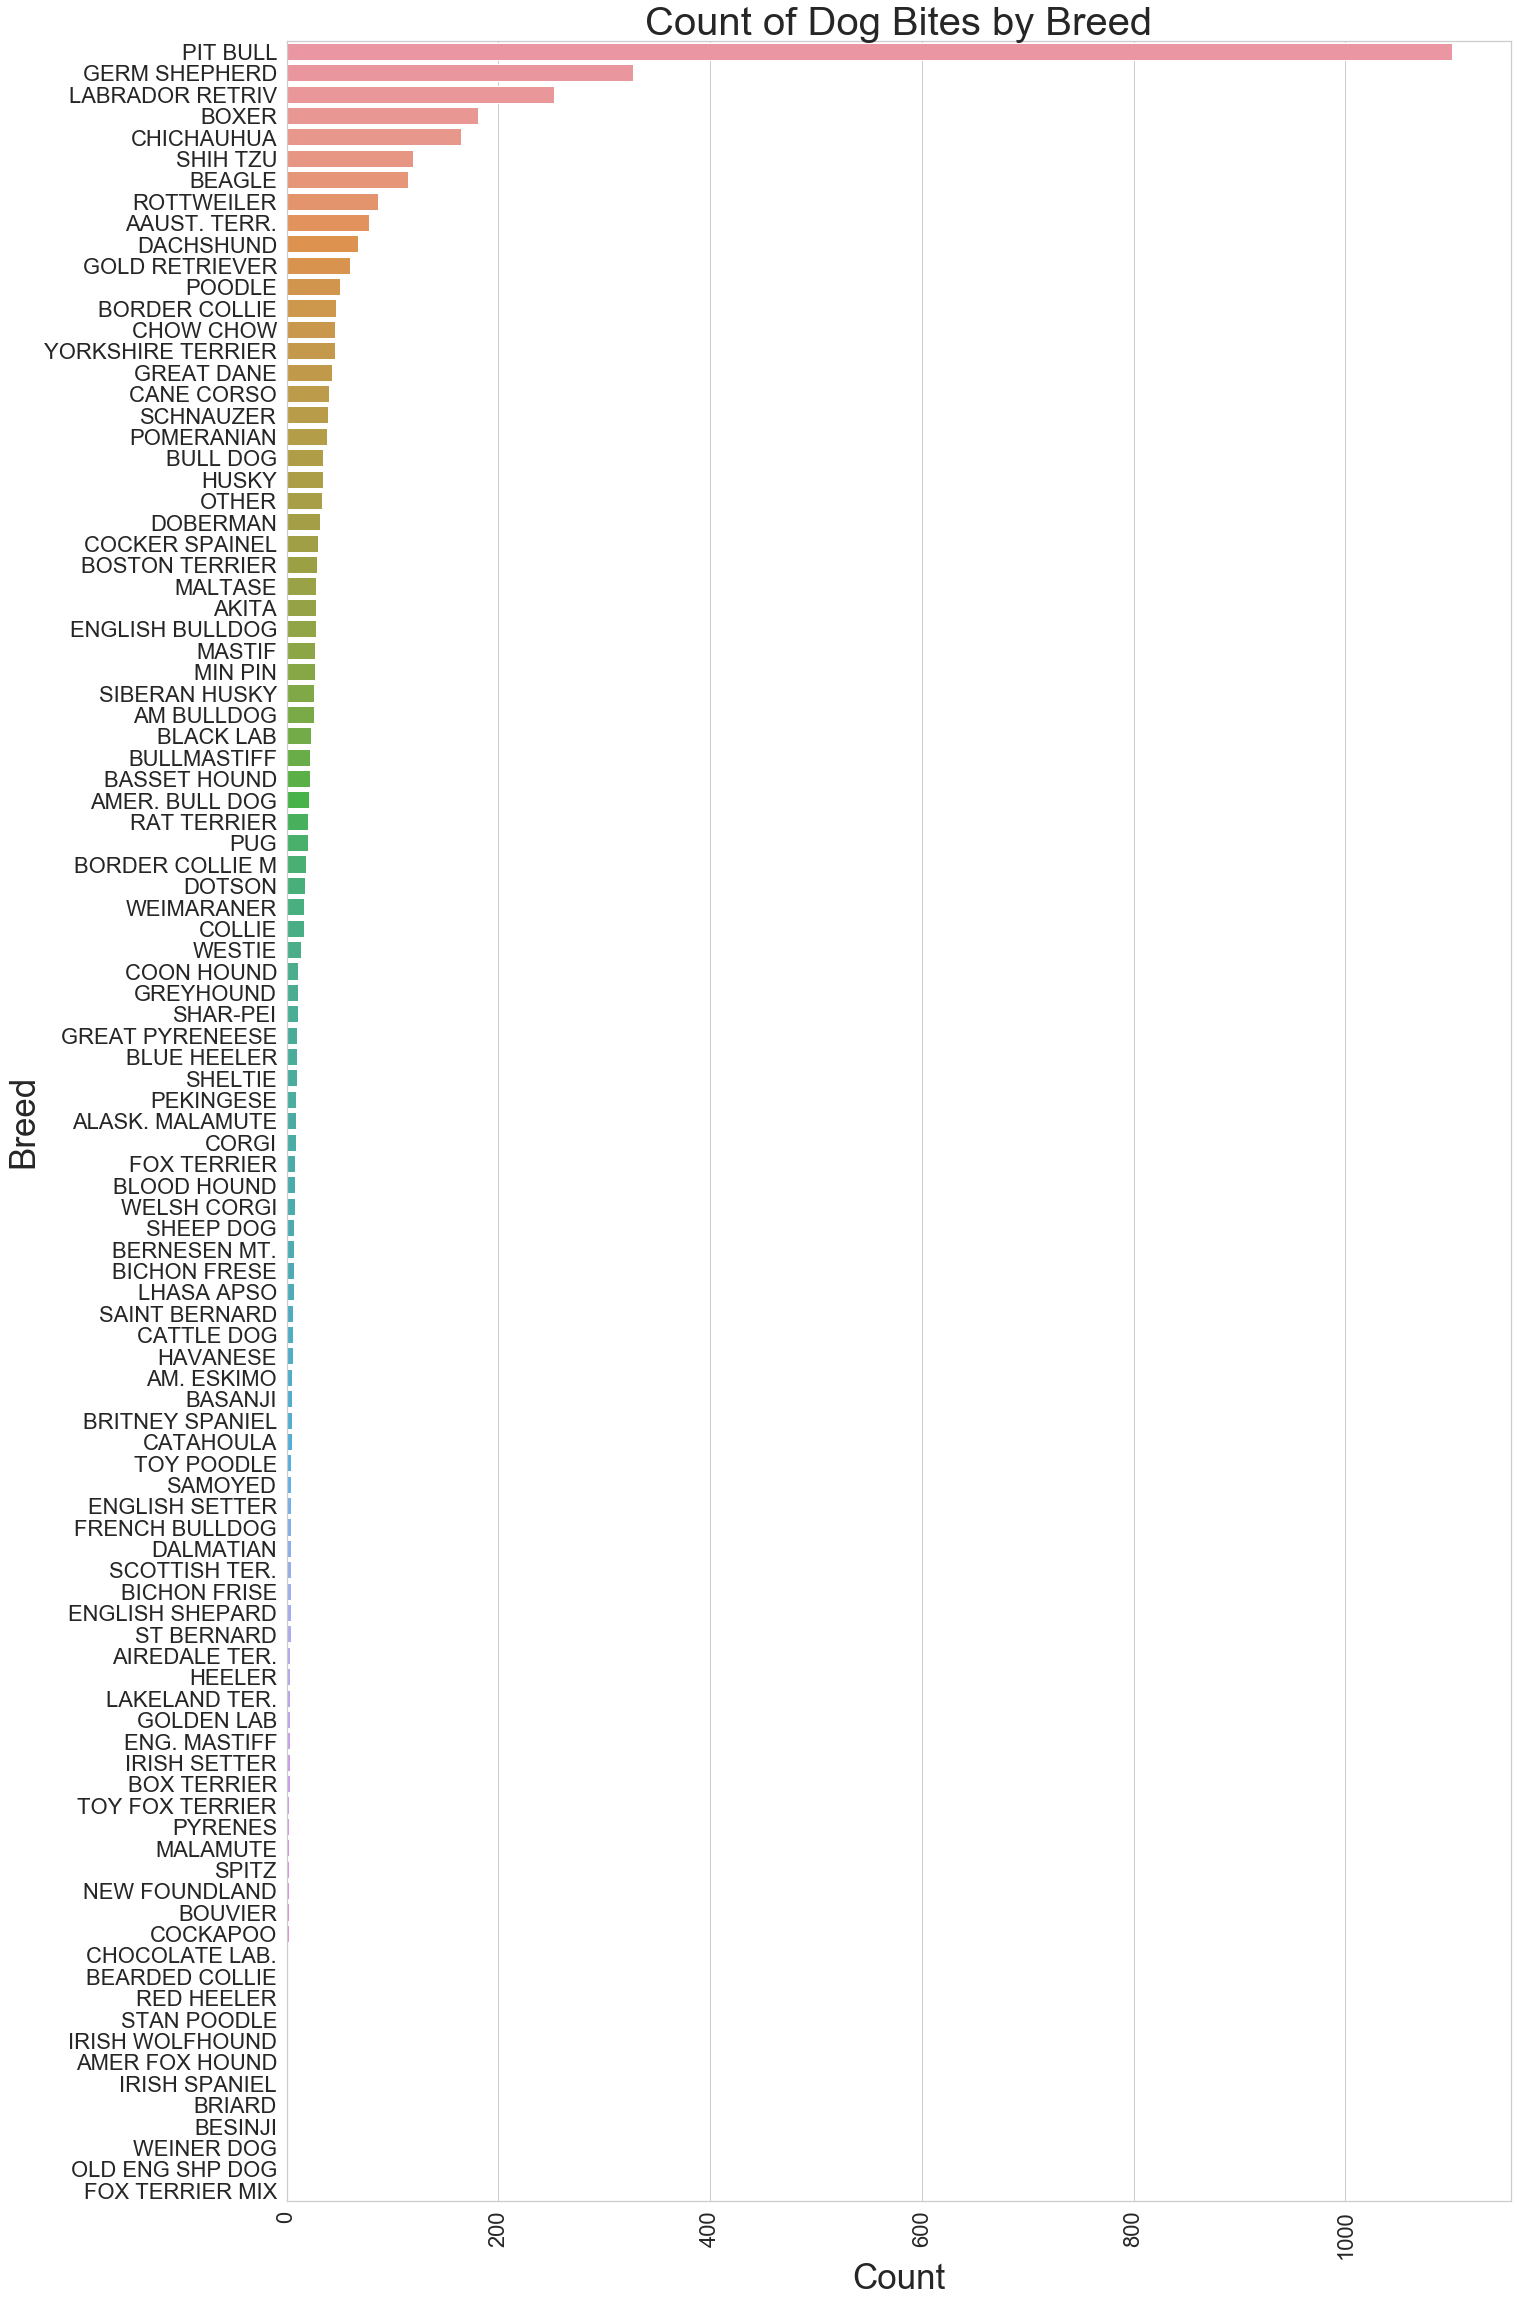

In [12]:
# Makes breed names bigger
with sns.plotting_context('notebook', font_scale=2): 
    # White background
    sns.set_style("whitegrid") 
    # Makes plot larger
    ax = plt.subplots(figsize=(20,25)) 
    
    #Plot the number of dogs in each breed on y axis
    sns.countplot(y= 'BreedIDDesc' 
                  # Tells sns.countplot which dataset to use
                  , data = dogs_with_breed 
                  # Orders results by size
                  , order = dogs_with_breed['BreedIDDesc'].value_counts().index 
                 )
    # Rotates x-axis labels
    plt.xticks(rotation=90) 
    # Title with larger text size
    plt.title('Count of Dog Bites by Breed', fontsize = 40)
    # X-axis label with larger text size
    plt.xlabel('Count', fontsize = 35)
    # Y-axis label with larger text size
    plt.ylabel('Breed', fontsize = 35)
    # Changes the size of bars and spacing
    plt.subplots_adjust(top=2, bottom=.8, left=0.10, right=0.95, hspace= 1
                        , wspace=0.5) 

# The Story

When a family takes on the responsibility of adopting a dog and wants to know what will be the best family pet!<br>
<br>
The simple answer to the question is Pit Bulls have the perfromed the most bites of the breeds.<br> 
<br>
I think this leaves more questions for myself than it does answer: I wonder how universal these numbers might hold up in different areas of the country or world? I wonder how many reported results are present even within this dataset? I wonder what the population of the breeds of dogs are in this area and how the incidents of biting is represented within the quantities of each breed?<br>
<br>
I can see this short journey through the dataset and looking at the singular question of what breed of dog has bitten the most people I excited to continue on this adventure to see what could be the best dog for a family!